In [ ]:
import numpy as np
import pandas as pd
import nltk
import re
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
nltk.download("popular")

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cmudict.zip.
[nltk_data]    | Downloading package gazetteers to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gazetteers.zip.
[nltk_data]    | Downloading package genesis to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/genesis.zip.
[nltk_data]    | Downloading package gutenberg to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gutenberg.zip.
[nltk_data]    | Downloading package inaugural to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/inaugural.zip.
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/movie_reviews.zip.
[nltk_data]    | Downloading package names to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/names.zip.
[nltk_data]    | Downloading package shakespeare to /root/nltk_data...
[nlt

True

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/shai-training-2023-a-level-2/Train.csv')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data2 = pd.read_csv('/content/drive/MyDrive/shai-training-2023-a-level-2/Valid.csv')

In [ ]:
data.head(5)

,text,label
0,I grew up (b. 1965) watching and loving the Th...,0
1,"When I put this movie in my DVD player, and sa...",0
2,Why do people who do not know what a particula...,0
3,Even though I have great interest in Biblical ...,0
4,Im a die hard Dads Army fan and nothing will e...,1


In [ ]:
data2.head(5)

,text,label
0,It's been about 14 years since Sharon Stone aw...,0
1,someone needed to make a car payment... this i...,0
2,The Guidelines state that a comment must conta...,0
3,This movie is a muddled mish-mash of clichés f...,0
4,Before Stan Laurel became the smaller half of ...,0


In [ ]:
data1 = data.copy(deep=True)

In [ ]:
test= data2.copy(deep=True)

In [ ]:
data1["word_count"] = data1["text"].apply(lambda x: len(x.split(" ")))

In [ ]:
test["word_count"] = test["text"].apply(lambda x: len(x.split(" ")))

In [ ]:
data1["word_count"].describe()

count    40000.000000
mean       231.328975
std        171.178333
min          4.000000
25%        126.000000
50%        173.000000
75%        282.000000
max       2470.000000
Name: word_count, dtype: float64

In [ ]:
test["word_count"].describe()

count    5000.000000
mean      228.916600
std       169.312259
min        10.000000
25%       126.000000
50%       171.000000
75%       274.000000
max      1601.000000
Name: word_count, dtype: float64

In [ ]:
data1["char_count"] = data1["text"].apply(len)
data1["char_count"] .describe()

count    40000.000000
mean      1310.293250
std        988.358599
min         32.000000
25%        698.000000
50%        973.000000
75%       1596.000000
max      13704.000000
Name: char_count, dtype: float64

In [ ]:
test["char_count"] = test["text"].apply(len)
test["char_count"] .describe()

count    5000.00000
mean     1297.36800
std       979.91039
min        52.00000
25%       698.00000
50%       957.00000
75%      1560.25000
max      9345.00000
Name: char_count, dtype: float64

In [ ]:
data1.head()

,text,label,word_count,char_count
0,I grew up (b. 1965) watching and loving the Th...,0,151,874
1,"When I put this movie in my DVD player, and sa...",0,326,1811
2,Why do people who do not know what a particula...,0,184,983
3,Even though I have great interest in Biblical ...,0,69,351
4,Im a die hard Dads Army fan and nothing will e...,1,178,983


In [ ]:
test.head()

,text,label,word_count,char_count
0,It's been about 14 years since Sharon Stone aw...,0,385,2281
1,someone needed to make a car payment... this i...,0,147,777
2,The Guidelines state that a comment must conta...,0,48,281
3,This movie is a muddled mish-mash of clichés f...,0,217,1353
4,Before Stan Laurel became the smaller half of ...,0,539,3159


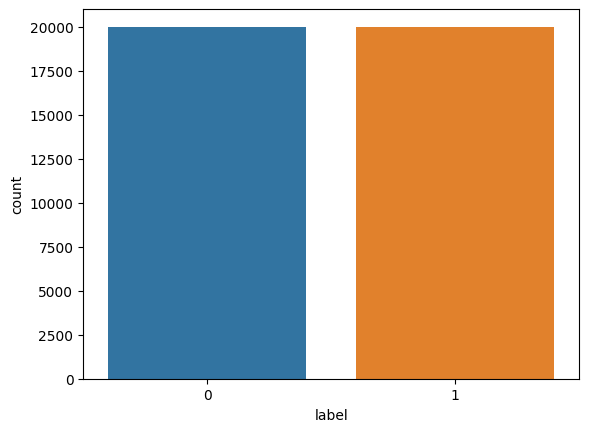

In [ ]:
sns.countplot(x=data['label'])
plt.show()

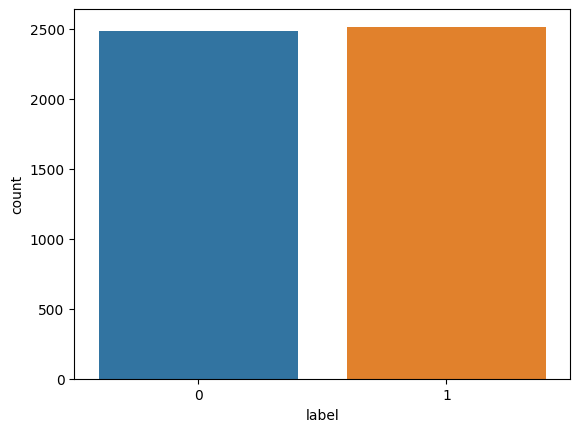

In [ ]:
sns.countplot(x=test['label'])
plt.show()

In [ ]:
sample=data1.loc[0,"text"]
sample

'I grew up (b. 1965) watching and loving the Thunderbirds. All my mates at school watched. We played "Thunderbirds" before school, during lunch and after school. We all wanted to be Virgil or Scott. No one wanted to be Alan. Counting down from 5 became an art form. I took my children to see the movie hoping they would get a glimpse of what I loved as a child. How bitterly disappointing. The only high point was the snappy theme tune. Not that it could compare with the original score of the Thunderbirds. Thankfully early Saturday mornings one television channel still plays reruns of the series Gerry Anderson and his wife created. Jonatha Frakes should hand in his directors chair, his version was completely hopeless. A waste of film. Utter rubbish. A CGI remake may be acceptable but replacing marionettes with Homo sapiens subsp. sapiens was a huge error of judgment.'

In [ ]:
sample1=test.loc[0,"text"]
sample1

'It\'s been about 14 years since Sharon Stone awarded viewers a leg-crossing that twisted many people\'s minds. And now, God knows why, she\'s in the game again. "Basic Instinct 2" is the sequel to the smash-hit erotica "Basic Instinct" featuring a sexy Stone and a vulnerable Michael Douglas. However, fans of the original might not even get close to this one, since "Instinct 2" is painful film-making, as the mediocre director Michael Caton-Jones assassinates the legacy of the first film.<br /><br />The plot of the movie starts when a car explosion breaks in right at the beginning. Catherine Tramell (Sharon Stone, trying to look forcefully sexy) is a suspect and appears to be involved in the murder. A psychiatrist (a horrible David Morrisey) is appointed to examine her, but eventually falls for an intimate game of seduction.<br /><br />And there it is, without no further explanations, the basic force that moves this "Instinct". Nothing much is explained and we have to sit through a slea

In [ ]:
def test_clean(fn , sample):
    print(sample, fn(sample), sep="\n")

In [ ]:
stop_words = stopwords.words("english")

In [ ]:
def remove_stop_words(text) :
    return " ".join([word for word in text.split(" ") if word not in stop_words])

In [ ]:
test_clean(remove_stop_words,sample)

I grew up (b. 1965) watching and loving the Thunderbirds. All my mates at school watched. We played "Thunderbirds" before school, during lunch and after school. We all wanted to be Virgil or Scott. No one wanted to be Alan. Counting down from 5 became an art form. I took my children to see the movie hoping they would get a glimpse of what I loved as a child. How bitterly disappointing. The only high point was the snappy theme tune. Not that it could compare with the original score of the Thunderbirds. Thankfully early Saturday mornings one television channel still plays reruns of the series Gerry Anderson and his wife created. Jonatha Frakes should hand in his directors chair, his version was completely hopeless. A waste of film. Utter rubbish. A CGI remake may be acceptable but replacing marionettes with Homo sapiens subsp. sapiens was a huge error of judgment.
I grew (b. 1965) watching loving Thunderbirds. All mates school watched. We played "Thunderbirds" school, lunch school. We wa

In [ ]:
test_clean(remove_stop_words,sample1)

It's been about 14 years since Sharon Stone awarded viewers a leg-crossing that twisted many people's minds. And now, God knows why, she's in the game again. "Basic Instinct 2" is the sequel to the smash-hit erotica "Basic Instinct" featuring a sexy Stone and a vulnerable Michael Douglas. However, fans of the original might not even get close to this one, since "Instinct 2" is painful film-making, as the mediocre director Michael Caton-Jones assassinates the legacy of the first film.<br /><br />The plot of the movie starts when a car explosion breaks in right at the beginning. Catherine Tramell (Sharon Stone, trying to look forcefully sexy) is a suspect and appears to be involved in the murder. A psychiatrist (a horrible David Morrisey) is appointed to examine her, but eventually falls for an intimate game of seduction.<br /><br />And there it is, without no further explanations, the basic force that moves this "Instinct". Nothing much is explained and we have to sit through a sleazy, 

In [ ]:
#Remove Hashtags
hash = re.compile(pattern="#[\w\d]+")

In [ ]:
def remove_hashtag(text: str) -> str:
    return hash.sub(repl="", string=text)

In [ ]:
test_clean(remove_hashtag,data1.loc[4,"text"])

Im a die hard Dads Army fan and nothing will ever change that. I got all the tapes, DVD's and audiobooks and every time i watch/listen to them its brand new. <br /><br />The film. The film is a re run of certain episodes, Man and the hour, Enemy within the gates, Battle School and numerous others with a different edge. Introduction of a new General instead of Captain Square was a brilliant move - especially when he wouldn't cash the cheque (something that is rarely done now).<br /><br />It follows through the early years of getting equipment and uniforms, starting up and training. All in all, its a great film for a boring Sunday afternoon. <br /><br />Two draw backs. One is the Germans bogus dodgy accents (come one, Germans cant pronounced the letter "W" like us) and Two The casting of Liz Frazer instead of the familiar Janet Davis. I like Liz in other films like the carry ons but she doesn't carry it correctly in this and Janet Davis would have been the better choice.
Im a die hard Da

In [ ]:
test_clean(remove_hashtag,test.loc[4,"text"])

Before Stan Laurel became the smaller half of the all-time greatest comedy team, he laboured under contract to Broncho Billy Anderson in a series of cheapies, many of which were parodies of major Hollywood features. Following a dispute with Anderson, Laurel continued the informal series of parodies at Joe Rock's smaller (and more indigent) production company.<br /><br />Most of Laurel's parody films were only mildly funny at the time, and even less funny for modern audiences who haven't seen the original movie which Laurel is parodying. 'West of Hot Dog' is a fairly generic parody of cowboy shoot-'em-ups. It's marginally a specific parody of 'West of the Pecos', an oater released two years earlier with no major actors. Since 'West of the Pecos' was never a huge success, it's difficult to see why Stan's film unit chose this particular movie as a target for their lampoonery, much less why they waited so long after its release to parody it. And where did they get that title 'West of Hot D

In [ ]:
#Remove Punctuation Marks
punc_re = re.compile(r"""[!"#$%&\'()*+,-./:;<=>?@[\\\]^_`{|}~،؟…«“\":\"…”]""")
def remove_punctation(text: str) -> str:
    return punc_re.sub(repl="", string=text)

#Remove Mention
mention_re = re.compile("@\w+")
def remove_mention(text):
    return mention_re.sub(repl="", string=text)
#Remove HTTP URLs
def remove_urls(data):
    return re.sub('((www\.[^\s]+)|(https?://[^\s]+))',' ',data)

#Remove Numbers
numbers_re = re.compile("\d+")
def remove_numbers(text):
    return numbers_re.sub(repl="", string=text)
#Remove Multiple Whitespace
multiple_space_re = re.compile("\s{2,}")
def remove_multiple_whitespace(text):
    return multiple_space_re.sub(repl=" ", string=text)

In [ ]:
def clean(text):
    text = remove_urls(text)
    text = remove_hashtag(text)
    text = remove_mention(text)
    text = remove_punctation(text)
    text = remove_numbers(text)
    text = remove_stop_words(text)
    text = remove_multiple_whitespace(text)
    text = text.lower().strip()


    return text

In [ ]:
data1["clean_text"] = data1["text"].apply(clean)

In [ ]:
test["clean_text"] = test["text"].apply(clean)

In [ ]:
from nltk.stem.lancaster import LancasterStemmer
stemmer = nltk.LancasterStemmer()
stemmed_data = []
for sample in data1["clean_text"]:
    words = sample.split(" ")
    stemmed_words = [stemmer.stem(word) for word in words]
    stemmed_data.append(" ".join(stemmed_words))

In [ ]:
from nltk.stem.lancaster import LancasterStemmer
stemmer = nltk.LancasterStemmer()
Stemmed_data = []
for sample1 in test["clean_text"]:
    words = sample1.split(" ")
    Stemmed_words = [stemmer.stem(word) for word in words]
    Stemmed_data.append(" ".join(Stemmed_words))

In [ ]:
texts_class_positive = data1[data1['label'] == 1]['clean_text']
texts_class_negative = data1[data1['label'] == 0]['clean_text']

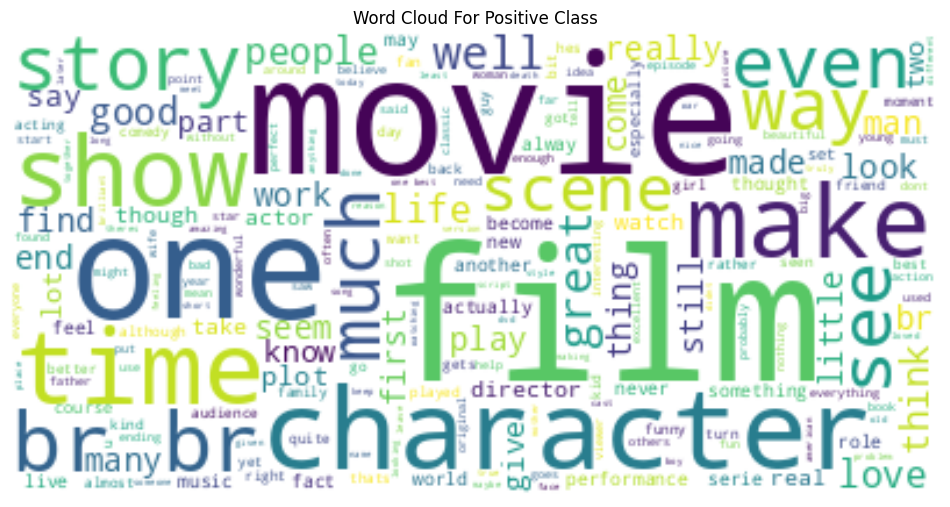

In [ ]:
# Generate word cloud for class A
wordcloud_positive = WordCloud(background_color='white').generate(' '.join(texts_class_positive))

plt.figure(figsize=(12, 8))
plt.imshow(wordcloud_positive, interpolation='bilinear')
plt.title('Word Cloud For Positive Class')
plt.axis('off');

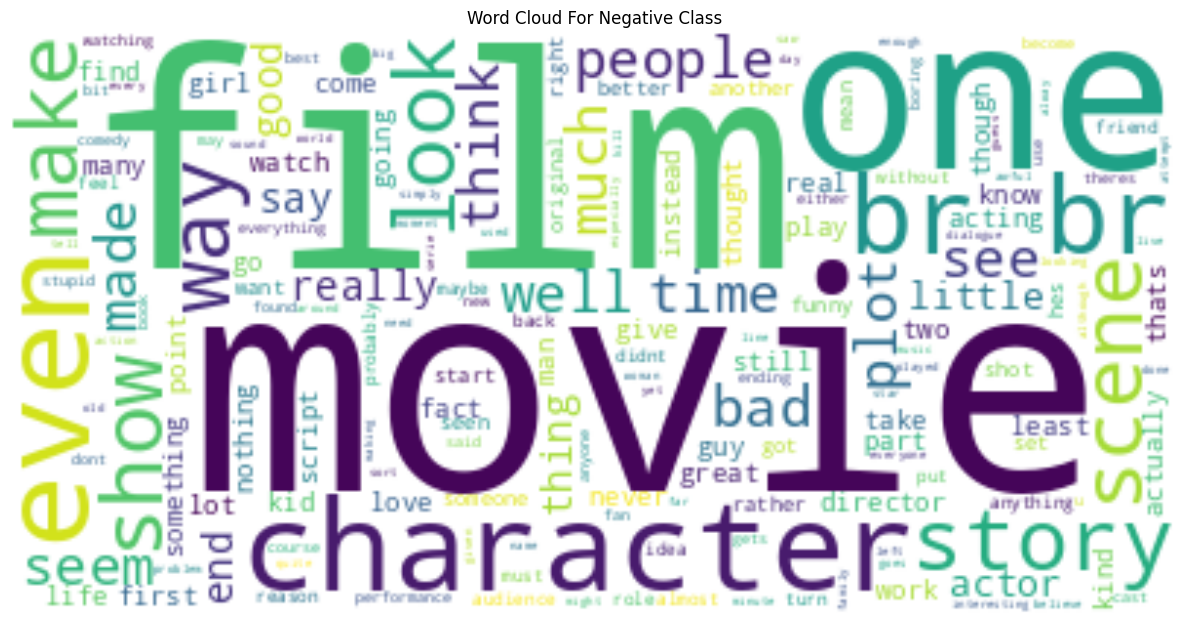

In [ ]:
# Generate word cloud for class B
wordcloud_negative = WordCloud(background_color='white').generate(' '.join(texts_class_negative))

plt.figure(figsize=(12, 8))
plt.imshow(wordcloud_negative, interpolation='bilinear')
plt.title('Word Cloud For Negative Class')
plt.axis('off')

plt.tight_layout()
plt.show()

In [ ]:
data1.head()

,text,label,word_count,char_count,clean_text
0,I grew up (b. 1965) watching and loving the Th...,0,151,874,i grew b watching loving thunderbirds all mate...
1,"When I put this movie in my DVD player, and sa...",0,326,1811,when i put movie dvd player sat coke chips i e...
2,Why do people who do not know what a particula...,0,184,983,why people know particular time past like feel...
3,Even though I have great interest in Biblical ...,0,69,351,even though i great interest biblical movies i...
4,Im a die hard Dads Army fan and nothing will e...,1,178,983,im die hard dads army fan nothing ever change ...


In [ ]:
test.head()

,text,label,word_count,char_count,clean_text
0,It's been about 14 years since Sharon Stone aw...,0,385,2281,its years since sharon stone awarded viewers l...
1,someone needed to make a car payment... this i...,0,147,777,someone needed make car payment truly awful ma...
2,The Guidelines state that a comment must conta...,0,48,281,the guidelines state comment must contain mini...
3,This movie is a muddled mish-mash of clichés f...,0,217,1353,this movie muddled mishmash clichés recent cin...
4,Before Stan Laurel became the smaller half of ...,0,539,3159,before stan laurel became smaller half alltime...


In [ ]:
print(data1['clean_text'][0],"\n\n",stemmed_data[0])

i grew b watching loving thunderbirds all mates school watched we played thunderbirds school lunch school we wanted virgil scott no one wanted alan counting became art form i took children see movie hoping would get glimpse i loved child how bitterly disappointing the high point snappy theme tune not could compare original score thunderbirds thankfully early saturday mornings one television channel still plays reruns series gerry anderson wife created jonatha frakes hand directors chair version completely hopeless a waste film utter rubbish a cgi remake may acceptable replacing marionettes homo sapiens subsp sapiens huge error judgment 

 i grew b watch lov thunderbird al mat school watch we play thunderbird school lunch school we want virgil scot no on want al count becam art form i took childr see movy hop would get glimps i lov child how bit disappoint the high point snappy them tun not could comp origin scor thunderbird thank ear saturday morn on televid channel stil play rerun ser

In [ ]:
data1['clean_stemmed']=stemmed_data

In [ ]:
test['clean_stemmed']=Stemmed_data

In [ ]:
data1['clean_stemmed']

0        i grew b watch lov thunderbird al mat school w...
1        when i put movy dvd play sat cok chip i expect...
2        why peopl know particul tim past lik feel nee ...
3        ev though i gre interest bibl movy i bor dea e...
4        im die hard dad army fan noth ev chang i got t...
                               ...                        
39995    western un someth forgot class western perhap ...
39996    thi movy incred piec work it expl every nook c...
39997    my wif i watch movy plan visit sicy stromboli ...
39998    when i first watch flatlin i amaz it necess fe...
39999    why would film good gross estim no award nomin...
Name: clean_stemmed, Length: 40000, dtype: object

In [ ]:
test['clean_stemmed']

0       it year sint sharon ston award view legcross t...
1       someon nee mak car pay tru aw mak jean claud c...
2       the guidelin stat com must contain minim four ...
3       thi movy muddl mishmash cliché rec cinem ther ...
4       bef stan laurel becam smal half alltim greates...
                              ...                        
4995    man i lov movy thi real tak back i kid thes da...
4996    recovery incred mov piec work handl devast eff...
4997    you tak crook joint seem excess difficult tak ...
4998    futz show preserv expery the mov new york orig...
4999    the moth tel rec widow mid moth two adult chil...
Name: clean_stemmed, Length: 5000, dtype: object

In [ ]:
lm=nltk.WordNetLemmatizer()
Lemmatizer_data=[]
for sample in data1['clean_text']:
    words=sample.split(' ')
    Lemmatizer_words=[lm.lemmatize(word) for word in words]
    Lemmatizer_data.append(" ".join(Lemmatizer_words))

In [ ]:
lm=nltk.WordNetLemmatizer()
lemmatizer_data=[]
for sample1 in test['clean_text']:
    words1=sample1.split(' ')
    lemmatizer_words=[lm.lemmatize(word1) for word1 in words1]
    lemmatizer_data.append(" ".join(lemmatizer_words))

In [ ]:
print(data1['clean_text'][0],"\n\n",Lemmatizer_data[0])

i grew b watching loving thunderbirds all mates school watched we played thunderbirds school lunch school we wanted virgil scott no one wanted alan counting became art form i took children see movie hoping would get glimpse i loved child how bitterly disappointing the high point snappy theme tune not could compare original score thunderbirds thankfully early saturday mornings one television channel still plays reruns series gerry anderson wife created jonatha frakes hand directors chair version completely hopeless a waste film utter rubbish a cgi remake may acceptable replacing marionettes homo sapiens subsp sapiens huge error judgment 

 i grew b watching loving thunderbird all mate school watched we played thunderbird school lunch school we wanted virgil scott no one wanted alan counting became art form i took child see movie hoping would get glimpse i loved child how bitterly disappointing the high point snappy theme tune not could compare original score thunderbird thankfully early

In [ ]:
print(test['clean_text'][0],"\n\n",lemmatizer_data[0])

its years since sharon stone awarded viewers legcrossing twisted many peoples minds and god knows shes game basic instinct sequel smashhit erotica basic instinct featuring sexy stone vulnerable michael douglas however fans original might even get close one since instinct painful filmmaking mediocre director michael catonjones assassinates legacy first filmbr br the plot movie starts car explosion breaks right beginning catherine tramell sharon stone trying look forcefully sexy suspect appears involved murder a psychiatrist horrible david morrisey appointed examine eventually falls intimate game seductionbr br and without explanations basic force moves instinct nothing much explained sit sleazy cclass erotic film sharon stone stars first role time turnoff part amateurish writing careless direction terrifyingly low chemistry the movie full vulgar dialogues even sexuality menage trois scene cut wouldnt rated nc first entrance series instinct compelling torturebr br to top everything made 

In [ ]:
data1['Lemmatizer_data'] = Lemmatizer_data

In [ ]:
test['lemmatizer_data'] = lemmatizer_data

In [ ]:
data1.head()

,text,label,word_count,char_count,clean_text,clean_stemmed,Lemmatizer_data
0,I grew up (b. 1965) watching and loving the Th...,0,151,874,i grew b watching loving thunderbirds all mate...,i grew b watch lov thunderbird al mat school w...,i grew b watching loving thunderbird all mate ...
1,"When I put this movie in my DVD player, and sa...",0,326,1811,when i put movie dvd player sat coke chips i e...,when i put movy dvd play sat cok chip i expect...,when i put movie dvd player sat coke chip i ex...
2,Why do people who do not know what a particula...,0,184,983,why people know particular time past like feel...,why peopl know particul tim past lik feel nee ...,why people know particular time past like feel...
3,Even though I have great interest in Biblical ...,0,69,351,even though i great interest biblical movies i...,ev though i gre interest bibl movy i bor dea e...,even though i great interest biblical movie i ...
4,Im a die hard Dads Army fan and nothing will e...,1,178,983,im die hard dads army fan nothing ever change ...,im die hard dad army fan noth ev chang i got t...,im die hard dad army fan nothing ever change i...


In [ ]:
test.head()

,text,label,word_count,char_count,clean_text,clean_stemmed,lemmatizer_data
0,It's been about 14 years since Sharon Stone aw...,0,385,2281,its years since sharon stone awarded viewers l...,it year sint sharon ston award view legcross t...,it year since sharon stone awarded viewer legc...
1,someone needed to make a car payment... this i...,0,147,777,someone needed make car payment truly awful ma...,someon nee mak car pay tru aw mak jean claud c...,someone needed make car payment truly awful ma...
2,The Guidelines state that a comment must conta...,0,48,281,the guidelines state comment must contain mini...,the guidelin stat com must contain minim four ...,the guideline state comment must contain minim...
3,This movie is a muddled mish-mash of clichés f...,0,217,1353,this movie muddled mishmash clichés recent cin...,thi movy muddl mishmash cliché rec cinem ther ...,this movie muddled mishmash clichés recent cin...
4,Before Stan Laurel became the smaller half of ...,0,539,3159,before stan laurel became smaller half alltime...,bef stan laurel becam smal half alltim greates...,before stan laurel became smaller half alltime...


In [ ]:
X_train = data1['Lemmatizer_data']
X_test = test['lemmatizer_data']
y_train = data1['label']
y_test = test['label']

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((40000,), (5000,), (40000,), (5000,))

In [ ]:
!pip install --upgrade scikit-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import plotly.express as px

from sklearn.model_selection import train_test_split

import re
import string
import nltk

from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from collections import Counter
#from wordcloud import WordCloud

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.feature_extraction.text import CountVectorizer,TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from tqdm.auto import tqdm

#from keras.preprocessing.text import Tokenizer
#from keras.models import Sequential
#from keras.layers import Dense,Dropout

In [ ]:
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay

In [ ]:
def test_pipeline(model):
    pipe=Pipeline([('bow',CountVectorizer()),('tfidf',TfidfTransformer()),('model',model)])
    pipe.fit(X_train,y_train)
    y_pred=pipe.predict(X_test)
    print('Accuracy Score: ',accuracy_score(y_test,y_pred))
    print(classification_report(y_test,y_pred))
    cm = confusion_matrix(y_test, y_pred, labels=pipe.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=pipe.classes_)
    disp.plot()
    plt.show()

Accuracy Score:  0.865
              precision    recall  f1-score   support

           0       0.85      0.88      0.87      2486
           1       0.88      0.85      0.86      2514

    accuracy                           0.86      5000
   macro avg       0.87      0.87      0.86      5000
weighted avg       0.87      0.86      0.86      5000



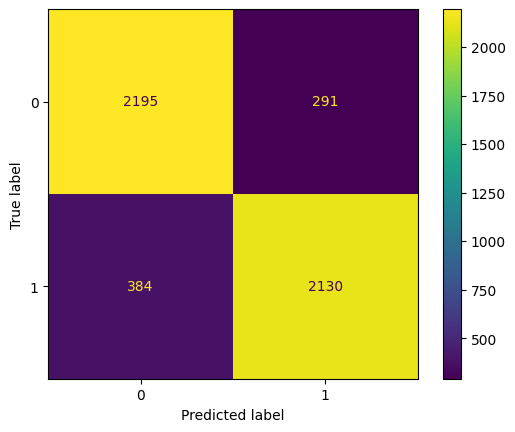

In [ ]:
test_pipeline(MultinomialNB())

Accuracy Score:  0.856
              precision    recall  f1-score   support

           0       0.84      0.88      0.86      2486
           1       0.88      0.83      0.85      2514

    accuracy                           0.86      5000
   macro avg       0.86      0.86      0.86      5000
weighted avg       0.86      0.86      0.86      5000



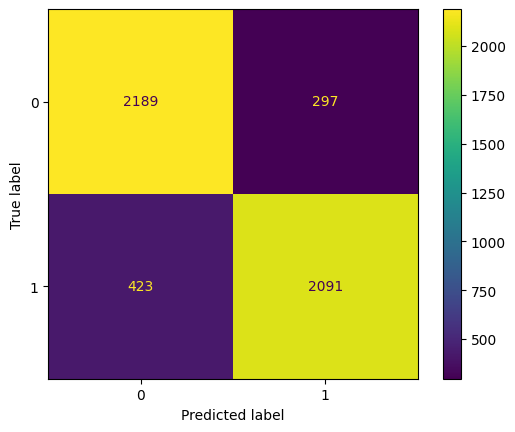

In [ ]:
test_pipeline(BernoulliNB())

Accuracy Score:  0.8854
              precision    recall  f1-score   support

           0       0.90      0.87      0.88      2486
           1       0.87      0.90      0.89      2514

    accuracy                           0.89      5000
   macro avg       0.89      0.89      0.89      5000
weighted avg       0.89      0.89      0.89      5000



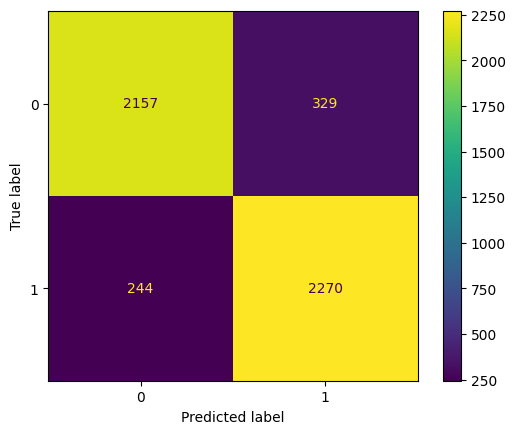

In [ ]:
test_pipeline(LogisticRegression())

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeClassifier

Accuracy Score:  0.8034
              precision    recall  f1-score   support

           0       0.83      0.76      0.79      2486
           1       0.78      0.85      0.81      2514

    accuracy                           0.80      5000
   macro avg       0.81      0.80      0.80      5000
weighted avg       0.81      0.80      0.80      5000



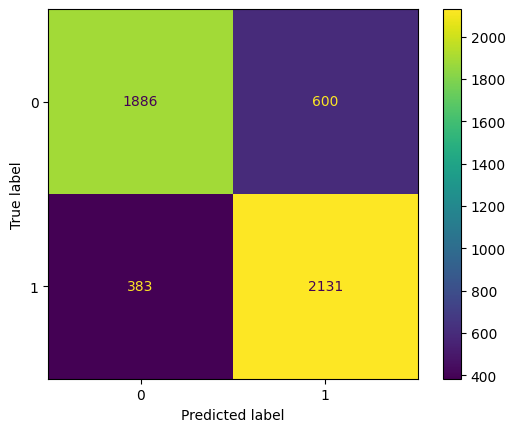

In [ ]:
test_pipeline(AdaBoostClassifier())

Accuracy Score:  0.8998
              precision    recall  f1-score   support

           0       0.91      0.88      0.90      2486
           1       0.89      0.92      0.90      2514

    accuracy                           0.90      5000
   macro avg       0.90      0.90      0.90      5000
weighted avg       0.90      0.90      0.90      5000



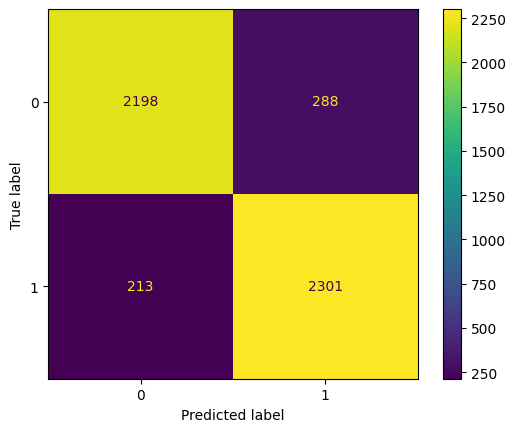

In [ ]:
test_pipeline(RidgeClassifier())

In [ ]:
pipe_ridge=Pipeline([('bow',CountVectorizer()),('tfidf',TfidfTransformer()),('model',RidgeClassifier())])
pipe_ridge.fit(X_train,y_train)
y_preds=pipe_ridge.predict(X_test)

In [ ]:
accuracy_score(y_test,y_preds)

0.8998

In [ ]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.1/7.1 MB 94.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 28.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 114.3 MB/s eta 0:00:00


In [ ]:
from transformers import TFAutoModelForSequenceClassification, AutoTokenizer
import tensorflow as tf

# Load the pre-trained model and tokenizer
model_name = "robertsamoilescu/movie-sentiment-distilbert-base-uncased"  # Example: BERT-base model
num_labels = 2  # Number of classification labels
model = TFAutoModelForSequenceClassification.from_pretrained(model_name, num_labels=num_labels)
tokenizer = AutoTokenizer.from_pretrained(model_name)

All model checkpoint layers were used when initializing TFDistilBertForSequenceClassification.

All the layers of TFDistilBertForSequenceClassification were initialized from the model checkpoint at robertsamoilescu/movie-sentiment-distilbert-base-uncased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFDistilBertForSequenceClassification for predictions without further training.


In [ ]:
# Example input text
input_text = "Such a bad movie"

# Tokenize input text
input_ids = tokenizer.encode(input_text, add_special_tokens=True)
input_ids = tf.convert_to_tensor(input_ids)

# Perform padding if necessary
padding_length = 128  # Set the desired maximum sequence length
input_ids = tf.pad(input_ids, [[0, padding_length - tf.shape(input_ids)[0]]])

# Reshape input tensor to match model's expected input shape
input_ids = tf.reshape(input_ids, [1, -1])

# Run the model forward pass
outputs = model(input_ids)
logits = outputs.logits

# Get predicted class probabilities
probabilities = tf.nn.softmax(logits, axis=1)
predicted_class = tf.argmax(probabilities, axis=1)

# Print the predicted class and probabilities
label_map = {0: "Negative", 1: "Positive"}  # Mapping of label indices to class names
print("Predicted class:", label_map[predicted_class.numpy()[0]])
print("Class probabilities:", probabilities.numpy()[0])

Predicted class: Negative
Class probabilities: [0.96532196 0.03467809]
